In [1]:
from rundmcmc.chain import MarkovChain
from rundmcmc.make_graph import construct_graph, add_data_to_graph, get_assignment_dict
from rundmcmc.partition import Partition, propose_random_flip
from rundmcmc.updaters import statistic_factory, cut_edges
from rundmcmc.validity import Validator, fast_connected
import geopandas as gp
import networkx as nx
import numpy as np
import areal_interpolation as areal
import scipy.linalg
import scipy.stats
import matplotlib.pyplot as plt
import time
from IPython import display 


def pull_districts(graph, cd_identifier):
    """Creates a dictionary of nodes to their CD.
    :param graph: the graph object you are working on.
    :param cd_identifier: How the congressional district is labeled on your graph.
    :return: A dictionary.
    """
    nodes = {}
    for (p, d) in graph.nodes(data=True):
        nodes[p] = d[cd_identifier]
    return nodes

In [2]:
df = gp.read_file("./testData/tl_2012_05_vtd10.shp")
df_cd =  gp.read_file('./testData/cd_us.shp')
df['dummy']=-1
df['temp'] = -1
(df,new_tar) = areal.aggregate(df,df_cd,['dummy'],['STATECD'])

In [3]:
graph = construct_graph(df, geoid_col="GEOID10")
add_data_to_graph(df, graph, ['STATECD', 'ALAND10'], id_col='GEOID10')
assignment = get_assignment_dict(df, "GEOID10", "STATECD")
CDS = set([x for x in assignment.values()])

In [16]:
def main(steps, interval):
    # Sketch:
    #   1. Load dataframe.
    #   2. Construct neighbor information.
    #   3. Make a graph from this.
    #   4. Throw attributes into graph.

    
    increment  = (0. + interval)/steps
    validator = Validator([fast_connected])

    updaters = {'area': statistic_factory('ALAND10', alias='area'), 'cut_edges': cut_edges}

    initial_partition = Partition(graph, assignment, updaters)
    accept = lambda x: True

    chain = MarkovChain(propose_random_flip, validator, accept,
                        initial_partition, total_steps=steps)#2**15)
    col = (1.,1.,0)
    for step in chain:
        if chain.counter%100 == 0: print("STEP "+ str(chain.counter))
        if chain.counter % interval == 0:
            print("ON STEP " + str(chain.counter))
            plan_graph = nx.Graph()
            for cd in CDS:
                district = [k for k in chain.state.assignment.keys() if chain.state.assignment[k]==cd]
                
                dist_nodes = [x for x,y in graph.nodes(data=True) if x in district]
                
                dist_graph = graph.subgraph(dist_nodes)
                
                plan_graph = nx.union(plan_graph,dist_graph)
                
                
            
            #adj = nx.adjacency_matrix(plan_graph)
            
            
            lap = nx.normalized_laplacian_matrix(plan_graph).todense()
            evals = np.real(scipy.linalg.eigvals(lap).tolist())
            evals.sort()
            plt.plot(range(len(evals)),evals,color=col)
            col = (1.,col[1]-increment, col[2]+increment)
            

    
    lap = nx.normalized_laplacian_matrix(graph).todense()
    evals = np.real(scipy.linalg.eigvals(lap).tolist())
    evals.sort()
    plt.plot(range(len(evals)),evals,color='k')
    plt.show()


STEP 100
STEP 200
STEP 300
STEP 400
STEP 500
STEP 600
STEP 700
STEP 800
STEP 900
STEP 1000
STEP 1100
STEP 1200
STEP 1300
STEP 1400
STEP 1500
STEP 1600
STEP 1700
STEP 1800
STEP 1900
STEP 2000
STEP 2100
STEP 2200
STEP 2300
STEP 2400
STEP 2500
STEP 2600
STEP 2700
STEP 2800
STEP 2900
STEP 3000
STEP 3100
STEP 3200
STEP 3300
STEP 3400
STEP 3500
STEP 3600
STEP 3700
STEP 3800
STEP 3900
STEP 4000
STEP 4100
STEP 4200
STEP 4300
STEP 4400
STEP 4500
STEP 4600
STEP 4700
STEP 4800
STEP 4900
STEP 5000
STEP 5100
STEP 5200
STEP 5300
STEP 5400
STEP 5500
STEP 5600
STEP 5700
STEP 5800
STEP 5900
STEP 6000
STEP 6100
STEP 6200
STEP 6300
STEP 6400
STEP 6500
STEP 6600
STEP 6700
STEP 6800
STEP 6900
STEP 7000
STEP 7100
STEP 7200
STEP 7300
STEP 7400
STEP 7500
STEP 7600
STEP 7700
STEP 7800
STEP 7900
STEP 8000
STEP 8100
STEP 8200
STEP 8300
STEP 8400
STEP 8500
STEP 8600
STEP 8700
STEP 8800
STEP 8900
STEP 9000
STEP 9100
STEP 9200
STEP 9300
STEP 9400
STEP 9500
STEP 9600
STEP 9700
STEP 9800
STEP 9900
STEP 10000
ON STEP 

STEP 74700
STEP 74800
STEP 74900
STEP 75000
STEP 75100
STEP 75200
STEP 75300
STEP 75400
STEP 75500
STEP 75600
STEP 75700
STEP 75800
STEP 75900
STEP 76000
STEP 76100
STEP 76200
STEP 76300
STEP 76400
STEP 76500
STEP 76600
STEP 76700
STEP 76800
STEP 76900
STEP 77000
STEP 77100
STEP 77200
STEP 77300
STEP 77400
STEP 77500
STEP 77600
STEP 77700
STEP 77800
STEP 77900
STEP 78000
STEP 78100
STEP 78200
STEP 78300
STEP 78400
STEP 78500
STEP 78600
STEP 78700
STEP 78800
STEP 78900
STEP 79000
STEP 79100
STEP 79200
STEP 79300
STEP 79400
STEP 79500
STEP 79600
STEP 79700
STEP 79800
STEP 79900
STEP 80000
ON STEP 80000
STEP 80100
STEP 80200
STEP 80300
STEP 80400
STEP 80500
STEP 80600
STEP 80700
STEP 80800
STEP 80900
STEP 81000
STEP 81100
STEP 81200
STEP 81300
STEP 81400
STEP 81500
STEP 81600
STEP 81700
STEP 81800
STEP 81900
STEP 82000
STEP 82100
STEP 82200
STEP 82300
STEP 82400
STEP 82500
STEP 82600
STEP 82700
STEP 82800
STEP 82900
STEP 83000
STEP 83100
STEP 83200
STEP 83300
STEP 83400
STEP 83500
STEP 83

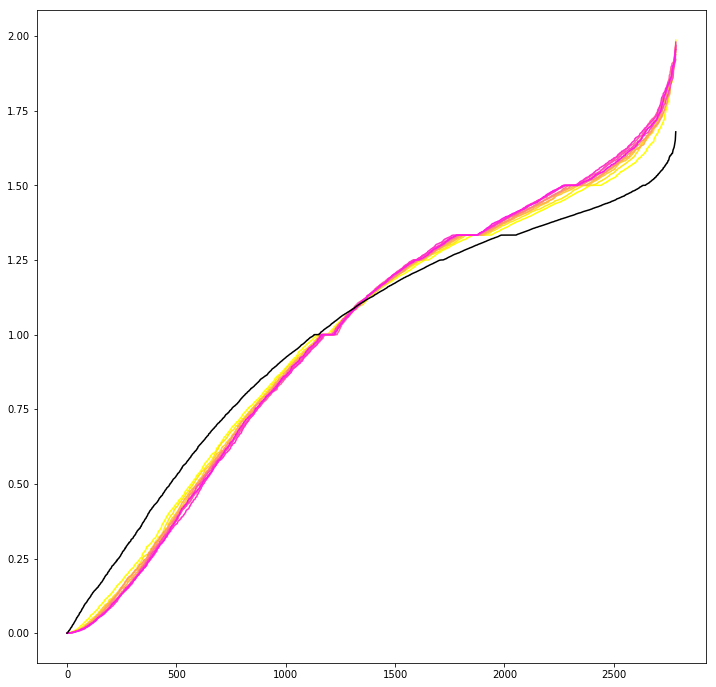

In [17]:
plt.figure(figsize=(12,12))
main(100000,10000)
